In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

%load_ext autoreload
%autoreload 2
from functions import *
from plots import *

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

# Import Traffic

In [487]:
df_traf_berth = pd.DataFrame.from_csv('data/berthoud_traffic.csv', index_col = 27, parse_dates= True)

In [488]:
df_traf_berth.tail()

,COUNTSTATIONID,COUNTDATE,COUNTDIR,HOUR0,HOUR1,HOUR2,HOUR3,HOUR4,HOUR5,HOUR6,...,HOUR14,HOUR15,HOUR16,HOUR17,HOUR18,HOUR19,HOUR20,HOUR21,HOUR22,HOUR23
FormattedDate,,,,,,,,,,,,,,,,,,,,,
2015-07-29,223,20150729,S,27,9,6,6,41,146,85,...,270,288,237,259,180,138,75,115,59,48
2015-07-30,223,20150730,P,7,6,4,5,11,26,80,...,323,372,375,320,328,223,113,78,46,33
2015-07-30,223,20150730,S,30,12,6,5,36,167,89,...,366,361,320,320,240,222,177,118,79,42
2015-07-31,223,20150731,P,8,3,6,8,17,25,93,...,342,308,363,347,356,234,135,104,76,35
2015-07-31,223,20150731,S,30,18,7,14,28,129,96,...,593,575,650,610,648,588,593,272,154,63


In [489]:
df_traf_berth.drop(['COUNTSTATIONID','COUNTDATE'], inplace = True, axis = 1)

In [490]:
df_traf_berth_ski = choose_date_range(2011, 11, 1, 2015, 5, 1, df_traf_i70)

In [491]:
df_traf_berth_ski.tail()

,COUNTDIR,HOUR0,HOUR1,HOUR2,HOUR3,HOUR4,HOUR5,HOUR6,HOUR7,HOUR8,...,HOUR14,HOUR15,HOUR16,HOUR17,HOUR18,HOUR19,HOUR20,HOUR21,HOUR22,HOUR23
FormattedDate,,,,,,,,,,,,,,,,,,,,,
2015-04-28,S,9,5,5,4,43,120,51,86,81,...,89,105,117,120,93,76,65,47,36,15
2015-04-29,P,2,4,3,2,13,22,65,80,85,...,122,123,215,119,136,66,42,22,24,10
2015-04-29,S,9,3,5,5,43,142,58,91,95,...,95,117,115,130,92,51,57,46,27,12
2015-04-30,P,3,2,1,3,9,16,62,85,104,...,149,125,221,140,132,56,29,18,16,6
2015-04-30,S,12,8,5,6,42,130,41,88,86,...,114,135,156,148,104,92,80,65,36,20


In [492]:
df_traf_berth_ski_prim, df_traf_berth_ski_sec = separate_traffic_directions(df_traf_berth_ski)

In [493]:
df_traf_berth_ski_sec.tail()

,COUNTDIR,HOUR0,HOUR1,HOUR2,HOUR3,HOUR4,HOUR5,HOUR6,HOUR7,HOUR8,...,HOUR14,HOUR15,HOUR16,HOUR17,HOUR18,HOUR19,HOUR20,HOUR21,HOUR22,HOUR23
FormattedDate,,,,,,,,,,,,,,,,,,,,,
2015-04-26,S,18,3,7,8,22,51,52,153,264,...,104,89,81,99,55,60,36,17,19,12
2015-04-27,S,4,7,2,10,32,81,42,63,74,...,89,81,94,110,59,48,39,30,18,13
2015-04-28,S,9,5,5,4,43,120,51,86,81,...,89,105,117,120,93,76,65,47,36,15
2015-04-29,S,9,3,5,5,43,142,58,91,95,...,95,117,115,130,92,51,57,46,27,12
2015-04-30,S,12,8,5,6,42,130,41,88,86,...,114,135,156,148,104,92,80,65,36,20


In [494]:
df_traf_berth_ski_prim, df_traf_berth_ski_sec = sum_morning_evening_and_drop_hourly(df_traf_berth_ski_prim, df_traf_berth_ski_sec)

In [495]:
df_traf_berth_ski_prim.tail()

,COUNTDIR,morning_east,evening_east
FormattedDate,,,
2015-04-26,P,1107,3503
2015-04-27,P,796,1014
2015-04-28,P,630,1004
2015-04-29,P,646,1113
2015-04-30,P,670,1160


In [496]:
df_traf_berth_ski_prim['all_day_east'] = df_traf_berth_ski_prim.morning_east + df_traf_ski_prim.evening_east
df_traf_berth_ski_sec['all_day_west'] = df_traf_berth_ski_sec.morning_west + df_traf_ski_sec.evening_west

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [497]:
df_traf_berth_ski_all = df_traf_ski_prim
df_traf_berth_ski_all['morning_west'] = df_traf_berth_ski_sec.morning_west 
df_traf_berth_ski_all['evening_west'] = df_traf_berth_ski_sec.evening_west
df_traf_berth_ski_all['all_day_west'] = df_traf_berth_ski_sec.all_day_west 

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [498]:
df_traf_berth_all = df_traf_berth_ski_all.drop('COUNTDIR', axis = 1)

In [499]:
df_traf_berth_ski_all.head()

,COUNTDIR,morning_east,evening_east,all_day_east,morning_west,evening_west,all_day_west
FormattedDate,,,,,,,
2011-11-01,P,577,1045,1622,811,859,1670
2011-11-02,P,252,767,1019,481,610,1091
2011-11-03,P,495,1094,1589,767,1019,1786
2011-11-04,P,595,1309,1904,1124,2390,3514
2011-11-05,P,508,1129,1637,760,1289,2049


In [500]:
df_traf_berth_ski_plot = df_traf_berth_ski_all.drop(['morning_east','evening_east', 'morning_west', 'evening_west'], axis = 1)

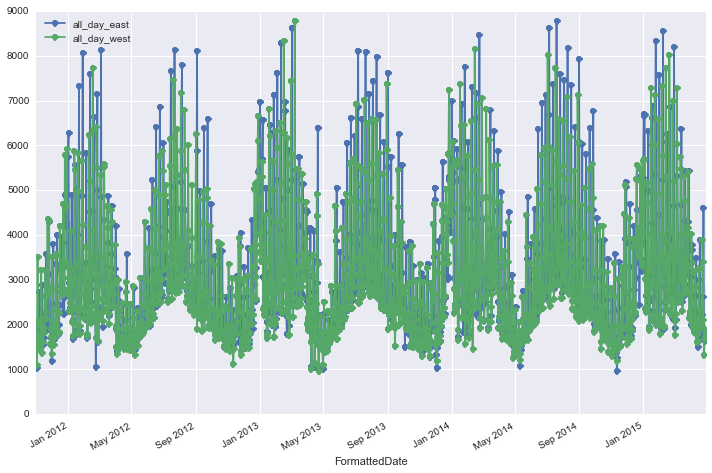

In [502]:
df_traf_berth_ski_plot.plot(marker = 'o')

In [506]:
df_traf_berth_ski_plot.head()

,COUNTDIR,all_day_west,all_day_east
FormattedDate,,,
2011-11-01,P,1622,1670
2011-11-02,P,1019,1091
2011-11-03,P,1589,1786
2011-11-04,P,1904,3514
2011-11-05,P,1637,2049


In [512]:
df_traf_berth_ski_plot = df_traf_berth_ski_plot.rename(columns={'all_day_east':'away_WP', 'all_day_west':'to_WP'})

## Opening/Closing Days
2011/2012: 11/12/2011-4/22/2012
2012/2013: 11/14/2012-4/21/2013
2013/2014: 11/13/2013-4/27/2014
2014/2015: 11/15/2014-4/26/2015

In [513]:
df_berthoud = df_traf_berth_ski_plot

In [514]:
df_berthoud.head()

,COUNTDIR,to_WP,away_WP
FormattedDate,,,
2011-11-01,P,1622,1670
2011-11-02,P,1019,1091
2011-11-03,P,1589,1786
2011-11-04,P,1904,3514
2011-11-05,P,1637,2049


In [515]:
day_of_week = []
for idx, day in df_berthoud.iterrows():
    day_of_week.append(idx.weekday())
    
df_berthoud['day_of_week'] = day_of_week
#4 = Friday
#5 = Sat
#6 = Sun

In [518]:
df_berthoud['net_cars'] = df_berthoud.to_WP - df_berthoud.away_WP
df_berthoud['net_cars'] = df_berthoud['net_cars'].shift(1)
df_berthoud['net_cars'][0] = 0

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [519]:
skiers = []
count = 0
for idx, row in df_berthoud.iterrows():
    count += row.net_cars
    skiers.append(count)

In [521]:
df_berthoud['skiers'] = skiers

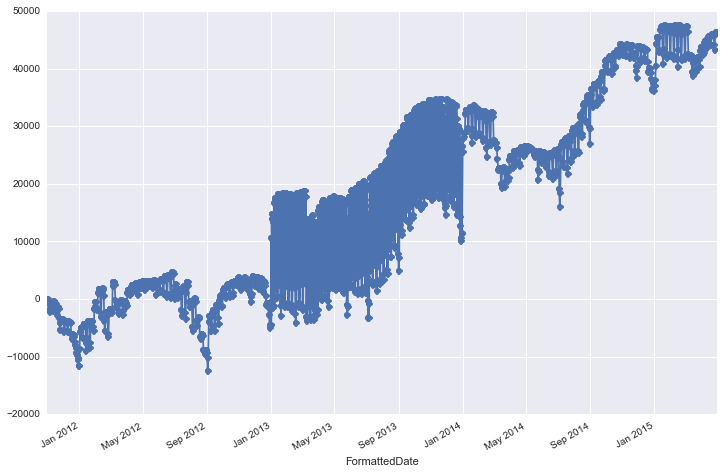

In [522]:
df_berthoud['skiers'].plot(marker='o')

In [423]:
df_berthoud.tail()

,berthoud_toward_i70,berthoud_away_i70,day_of_week,net_cars,skiers
FormattedDate,,,,,
2014-04-23,1642,1601,2,-96,735
2014-04-24,1704,1911,3,-41,694
2014-04-25,1956,2930,4,207,901
2014-04-26,2306,2641,5,974,1875
2014-04-27,3102,1675,6,335,2210


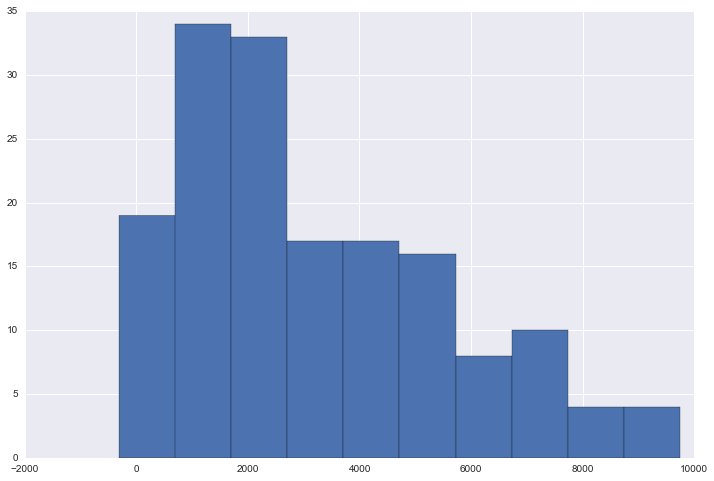

In [424]:
df_berthoud.skiers.hist()

In [425]:
df_berthoud.drop(['net_cars'], axis=1, inplace=True)

In [426]:
df_berthoud.head()

,berthoud_toward_i70,berthoud_away_i70,day_of_week,skiers
FormattedDate,,,,
2013-11-13,1659,1791,2,0
2013-11-14,1714,1923,3,132
2013-11-15,1935,3269,4,341
2013-11-16,2005,2211,5,1675
2013-11-17,3362,1453,6,1881


In [455]:
df_berthoud.to_csv('data/berthoud_skiers_11_12.csv')